You can view this notebook in Google Colab by clicking on [this link](https://colab.research.google.com/drive/11toT7lZQ8E9m3wT76_58HH4blpNsNwnz?usp=sharing). (Some of Latex expressions can't be displayed out of Google Colab)

# Binary logistic regression 


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

## Download the datasets

In [ ]:
! mkdir datasets
! wget -c "https://drive.google.com/uc?export=download&id=1yUWTLy4uzgTlLXCbenlcl1wJy2DNvcH7" -O datasets/notes.csv
! wget -c "https://drive.google.com/uc?export=download&id=1TTCB1qT0lAp-jAhTL5hNr_9qKCy8JQr6" -O datasets/COVID19_line_list_data.csv

--2021-11-26 20:54:32--  https://drive.google.com/uc?export=download&id=1yUWTLy4uzgTlLXCbenlcl1wJy2DNvcH7
Resolving drive.google.com (drive.google.com)... 173.194.69.138, 173.194.69.100, 173.194.69.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.69.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pe7j42a76j9b4tfdj1f1fkcgv5mc5t79/1637960025000/02428432253297012158/*/1yUWTLy4uzgTlLXCbenlcl1wJy2DNvcH7?e=download [following]
--2021-11-26 20:54:33--  https://doc-0c-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pe7j42a76j9b4tfdj1f1fkcgv5mc5t79/1637960025000/02428432253297012158/*/1yUWTLy4uzgTlLXCbenlcl1wJy2DNvcH7?e=download
Resolving doc-0c-8o-docs.googleusercontent.com (doc-0c-8o-docs.googleusercontent.com)... 142.250.153.132, 2a00:1450:4013:c16::84
Connecting to doc-0c-8o-docs.googleusercontent.com (doc-0

## 1- Implementation 

In [ ]:
# Data to test functions
# Unit tests
X_t = np.array([[2., -8.], [1., -2.], [1., 2.]])
Y_t = np.array([0., 1., 1.])
Theta_t = np.array([0.5, 0.25])

### 1.1- Utils

In [ ]:
# a function that normalizes a matrix on each column 
# in the training, we calculate the averages and the deviations of each column
# in the test, we do not have to recalculate these two parameters. 
# But, we must use those calculated in the training
def normaliser(X, mean=None, std=None): 
    if (mean is None) or (std is None): 
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
    X_norm = (X - mean)/std
    return X_norm, mean, std


normaliser(X_t)
#normaliser(X_t, 1, 4)

(array([[ 1.41421356, -1.29777137],
        [-0.70710678,  0.16222142],
        [-0.70710678,  1.13554995]]),
 array([ 1.33333333, -2.66666667]),
 array([0.47140452, 4.10960934]))

In [ ]:
# Prepare the features matrix for training or prediction
# We apply the normalization on each column (except if : norm=False)
# Then we add a column of 1's (except if : const=False)
def preparer(X, norm=True, const=True, mean=None, std=None): 
    X_pre = X.copy()
    if norm: 
        X_pre, mean, std = normaliser(X_pre)
    if const:
        X_pre = np.append(np.ones((X_pre.shape[0],1)), X_pre ,axis=1)
    return X_pre, mean, std

preparer(X_t)
#preparer(X_t, norm=False)
#preparer(X_t, const=False)

(array([[ 1.        ,  1.41421356, -1.29777137],
        [ 1.        , -0.70710678,  0.16222142],
        [ 1.        , -0.70710678,  1.13554995]]),
 array([ 1.33333333, -2.66666667]),
 array([0.47140452, 4.10960934]))

In [ ]:
# Define functions that generate vectors or matrices
# These functions will be used to generate Thetas

def generer_zeros_1(nbr):
    return np.zeros(nbr)

def generer_uns_1(nbr):
    return np.ones(nbr)

def generer_aleatoire_1(nbr):
    return np.random.rand(nbr)
    
generer_zeros_1(2), generer_uns_1(2), generer_aleatoire_1(2)

(array([0., 0.]), array([1., 1.]), array([0.41394689, 0.51279155]))

In [ ]:
def afficher_2(X, Y, L=None, Y_labels=["Admis", "Non admis"], X_labels=["Note 1", "Note 2"]):
    oui = Y == 1
    plt.scatter(X[oui, 0], X[oui, 1], color="green", marker="o", label=Y_labels[0])
    plt.scatter(X[~oui, 0], X[~oui, 1], color="red", marker="x", label=Y_labels[1])
    if L is not None:
        x_values, y_values = L
        plt.plot(x_values, y_values, label="ligne de decision")
    plt.xlabel(X_labels[0])
    plt.ylabel(X_labels[1])
    plt.legend()
    plt.show()

In [ ]:
# th0 + th1 * x1 + th2 * x2 = 0
def ligne_decision(X, Theta):
    X1 = [np.min(X[:,0]), np.max(X[:,0])]
    X2 = np.max(X[:,1])
    X2_min = X2 - (Theta[0] + Theta[1] * X1[0]) / Theta[2]
    X2_max = X2 - (Theta[0] + Theta[1] * X1[1]) / Theta[2]
    return X1, [X2_min, X2_max]

### 1.2- Linear combination
We combine the m characteristics linearly

$$z=\theta_0+\sum\limits_{i=1}^{m} \theta_i x_i = \theta^T X$$

In [ ]:
# The function that calculates the linear combination between the characteristics
def z_1(X, Theta): 
    return np.dot(X, Theta)

z_1(X_t, Theta_t)

array([-1.,  0.,  1.])

### 1.2- Probability calculation
The combined value is transformed to a probability using the logistic function 

$$\sigma(z)=\frac{1}{1 + e^{-z}}$$

In [ ]:
# The segmoid function
# It must work on scalars or vectors of numpy
def sigmoid(X):
    # Activation function used to render real values between 0 and 1 
    return  1/(1+np.exp(-X))

sigmoid(0), sigmoid(np.array([-1, 1]))

(0.5, array([0.26894142, 0.73105858]))

In [ ]:
def h_1(X, Theta, mean=None, std=None, const=False): 
    norm = (mean is not None) and (std is not None)
    X_pre, mean, std = preparer(X, norm, const, mean=mean, std=std)
    return sigmoid(z_1(X_pre, Theta))

h_1(X_t, Theta_t)

array([0.26894142, 0.5       , 0.73105858])

### 1.3- The loss function

$$ cout(h_\theta(x), y) = \begin{cases}
- \log(h_\theta(x)) & \text{ si } y = 1\\ 
- \log(1 - h_\theta(x))  & \text{ si } y = 0
\end{cases}$$

Because $ y \in \{0, 1\}$ donc, 

$$ cout(h_\theta(x), y) = - y \log(h_\theta(x)) - (1-y) \log(1 - h_\theta(x))$$

$$J(\theta) = \frac{1}{m} \sum\limits_{i=1}^{m} cout(h_\theta(x^{(i)}), y^{(i)})$$

In [ ]:
# The cost function used in the logistic regression 
# H is the prediction 
# Y is the true value
def J_1(H, Y): 
    ones = np.ones([1, Y.shape[0]])
    log_H = np.log(H)
    log_1_H = np.log(ones-H)
    return ((np.dot(-Y,log_H.T) - np.dot((ones - Y), log_1_H.T))/Y.shape[0])[0]

J_1(h_1(X_t, Theta_t), Y_t)

array([0.43989019])

### 1.4- The gradients

$$\frac{\partial J(\theta)}{\theta_j} = \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_{ij} $$

In [ ]:
# Define the gradient function:
def gradient_1(X, H, Y):
    return (np.dot(H-Y,X))/X.shape[0]

gradient_1(X_t, h_1(X_t, Theta_t), Y_t)

array([-0.07701953, -0.56313807])

### 1.5- Training (gradient algorithm)

The coefficients are updated iteratively based on the gradient and a $\alpha$ learning step. Since this function has been implemented in the previous tutorial, it is given here, but in a more parameterizable way.

$$\theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\theta_j} $$

Our training function takes the following parameters: 
- X : matrix (characteristic X samples)
- Y : vector (or matrix) of results (samples X nombre_classes)
- norm : if we normalize X or not (default : True)
- const : if we add $\theta_0$ or not (default : True)
- nbr_iter : number of iterations before exit
- alpha : the learning rate
- eps : the stop test if the difference between the costs (current and previous) is less than $\epsilon$ we stop the descent even if we have not finished all the iterations
- theta_func : the function which generates the $\theta$ (by default : zeros)
- h_func : the function that computes the probabilities (default : h_1)
- J_func : the cost function (default : J_1)
- grad_func : the function that computes the gradient (default : gradient_1)


In [ ]:

def entrainer_1(X, Y, norm=True, const=True, nbr_iter=200, alpha=1., eps=0.01, 
                theta_func=generer_zeros_1, h_func=h_1, J_func=J_1, grad_func=gradient_1): 
    
    X_pre, mean, std = preparer(X, norm, const)
    Theta = theta_func(X_pre.shape[1])
    
    couts = []
    couts.append(J_func(h_func(X_pre, Theta), Y))
    
    for i in range(nbr_iter):
        H = h_func(X_pre, Theta)
        Theta -= alpha * grad_func(X_pre, H, Y)
        couts.append(J_func(H, Y))
    
    return Theta, mean, std, couts

theta1, mean1, std1, couts1 = entrainer_1(X_t, Y_t)


theta1, mean1, std1, couts1[-1]

(array([ 1.98675108, -3.42409929,  2.41978457]),
 array([ 1.33333333, -2.66666667]),
 array([0.47140452, 4.10960934]),
 array([0.00383803]))

### 1.6- Prediction 

Given a threshold and probabilities, for each probability we return 1 if it exceeds or equals the threshold, 0 otherwise. 

In [ ]:
# H est un vecteur de probabilités 
def predire_1(H, seuil=0.5): 
    return (H >= seuil).astype(int)

predire_1(h_1(X_t, Theta_t))

array([0, 1, 1])

### 1.7- Grouping functions together 

In order to manage training and prediction, we group the functions you have implemented in a single class. The interest: 
- If we apply normalization during training, we must also apply it during prediction. Moreover, we have to use the same parameters (mean and standard deviation)
- We use the optimal thetas during the prediction


In [ ]:

class RegLogistique(object):
    
    def __init__(self, nbr_iter=100, alpha=1., theta_func=generer_zeros_1, norm=True, const=True): 
        self.nbr_iter = nbr_iter
        self.alpha = alpha
        self.theta_func = theta_func
        self.norm = norm
        self.const = const
    
    def entrainer(self, X, Y): 
        self.Theta, self.mean, self.std, self.couts = entrainer_1(X, Y, 
                                                                  nbr_iter=self.nbr_iter, 
                                                                  alpha=self.alpha, 
                                                                  theta_func=self.theta_func, 
                                                                  norm=self.norm, 
                                                                  const=self.const)
        
    # The prediction
    # if prob=True it returns a vector of probabilities
    # otherwise it returns a vector of 1 and 0
    def predire(self, X, prob=True, seuil=0.5):
        H = h_1(X, self.Theta, self.mean, self.std, self.const)
        if prob:
            return H
        return predire_1(H, seuil=seuil)

reg_lin = RegLogistique(const=False)
reg_lin.entrainer(X_t, Y_t)
reg_lin.predire(np.array([[2., -2.],[-1., 1.]]))

array([0.00205785, 0.99794215])

## 2- Application on a simple example 


We have generated a dataset with two grades out of 20. If the average is greater than or equal to 10 the class is "passed" (1), otherwise (0)

If you are interested in the code used to generate this dataset.

In [ ]:
notes = pd.read_csv("datasets/notes.csv")
notes.head()

,Note1,Note2,Admis
0,9.75,16.00,1
1,2.25,9.50,0
2,4.50,2.50,0
3,15.50,10.25,1
4,3.25,19.50,1


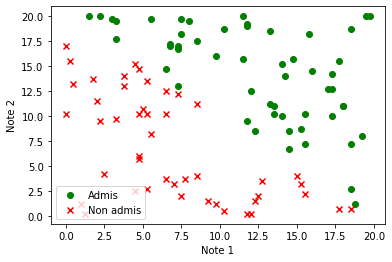

In [ ]:
# Extraction des features 
X_notes = notes.iloc[:, :-1].values # Premières colonnes 

Y_notes = notes.iloc[:,-1].values # Dernière colonne 

afficher_2(X_notes, Y_notes)

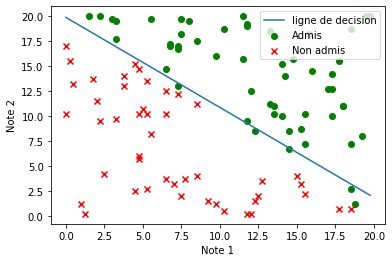

In [ ]:
reg_notes = RegLogistique()
reg_notes.entrainer(X_notes, Y_notes)

line_decision = ligne_decision(X_notes, reg_notes.Theta)

afficher_2(X_notes, Y_notes, L=line_decision)

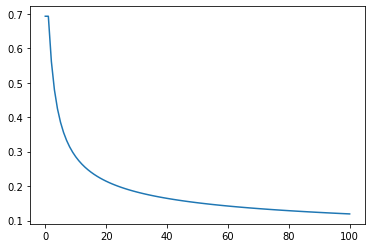

In [ ]:
plt.plot(reg_notes.couts)

## 3- Implementation on a real-life example

We want to help doctors to decide whether patients infected with COVID-19 should be hospitalized or treated at home. In this case, we want to estimate if a patient will recover or not. 

To do this, we will use [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset). For the sake of simplicity, we use the characteristics: country and age. 

### 3.1- Reading a dataset

In [ ]:
corona = pd.read_csv("datasets/COVID19_line_list_data.csv", index_col=0)
corona

,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
id,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
corona.shape[0]

1085

### 3.2- Preparation of the dataset

We want to prepare the dataset so that it is adequate to our problem (predict if a patient will recover or not)


In [ ]:
corona["recovered"].unique()
# We notice that the characteristic "recovered" has several possible values
# Here 0 means the patient is not recovered 
# 1 means that the patient is recovered
# The other values are dates and they mean that the party is recovered

# The characteristic "death" has the same meaning of values, but replacing "recovered" by "dead

array(['0', '1', '02/12/20', '1/15/2020', '12/30/1899', '02/08/20',
       '2/14/2020', '02/04/20', '2/18/2020', '02/05/20', '2/17/2020',
       '02/09/20', '2/15/2020', '2/27/2020', '2/19/2020', '2/20/2020',
       '1/17/2020', '02/07/20', '2/21/2020', '2/23/2020', '02/11/20',
       '2/22/2020', '2/16/2020', '2/24/2020', '2/26/2020', '2/25/2020',
       '02/06/20', '2/28/2020', '1/30/2020', '2/13/2020', '02/02/20',
       '1/31/2020'], dtype=object)

In [ ]:
# we want to keep only the samples where the patients are recovered or dead
#corona_1 = corona.loc[(corona["death"]!="0")]
corona = corona.loc[(corona["recovered"]!="0")|(corona["death"]!="0")]
#corona_2 = corona.death != "0"

corona.shape[0]

222

In [ ]:
# we want to keep only the characteristics "country", "age" and "recovered
corona = corona.filter(items=["country","age","recovered"])
corona.head()

,country,age,recovered
id,,,
49,China,61.0,0
50,China,69.0,0
51,China,89.0,0
52,China,89.0,0
53,China,66.0,0


In [ ]:
# we want the values of "recovered" to be 1 or 0
corona["recovered"] = corona["recovered"].map(lambda x: 0 if x == "0" else 1)
corona.isnull().sum()

country       0
age          19
recovered     0
dtype: int64

In [ ]:
# filter samples with null values (gender and age)
corona = corona[corona.age.notnull()]
corona.info()
# All three columns must have 203 non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 49 to 994
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    203 non-null    object 
 1   age        203 non-null    float64
 2   recovered  203 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 6.3+ KB


In [ ]:
# We want to keep only the first 3 countries in question in number
corona["country"].value_counts()

Singapore      59
China          42
South Korea    28
Malaysia       19
Japan          17
Vietnam         8
UAE             4
France          4
Hong Kong       4
Australia       4
USA             3
Thailand        3
Canada          2
Phillipines     2
Taiwan          1
Sri Lanka       1
Nepal           1
UK              1
Name: country, dtype: int64

In [ ]:
msk = corona["country"].isin(["Singapore", "China", "South Korea"])
corona = corona.loc[msk]
corona["country"].value_counts()

Singapore      59
China          42
South Korea    28
Name: country, dtype: int64

In [ ]:
# Feature extraction 
X_corona = corona.iloc[:, :-1].values # First Column 

Y_corona = corona.iloc[:,-1].values # Second Column

X_corona[:3, :]

array([['China', 61.0],
       ['China', 69.0],
       ['China', 89.0]], dtype=object)

### 3.3- Encoding of characteristics

The regression applies only to numerical and not nominal characteristics. 
We want to test the effect of choosing the right encoder. 
To do this, we will test with two encoders: 
- Ordinal encoding: the values of a characteristic are assigned numbers according to the order of the first occurrence 
- One Hot encoding: each value of a characteristic becomes a column with a value of 1 or 0

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

X_corona_pays = encoder.fit_transform(X_corona[:, 0].reshape(len(X_corona), 1))

X_corona_ordinal = np.concatenate((X_corona_pays, X_corona[:, 1].reshape((len(X_corona), 1))), axis=1)

X_corona_ordinal[:3, :]

array([[0.0, 61.0],
       [0.0, 69.0],
       [0.0, 89.0]], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

X_corona_pays = encoder.fit_transform(X_corona[:, 0].reshape(len(X_corona), 1))

X_corona_onehot = np.concatenate((X_corona_pays, X_corona[:, 1].reshape((len(X_corona), 1))), axis=1)

X_corona_onehot[:10, :]

array([[1.0, 0.0, 0.0, 61.0],
       [1.0, 0.0, 0.0, 69.0],
       [1.0, 0.0, 0.0, 89.0],
       [1.0, 0.0, 0.0, 89.0],
       [1.0, 0.0, 0.0, 66.0],
       [1.0, 0.0, 0.0, 75.0],
       [1.0, 0.0, 0.0, 48.0],
       [1.0, 0.0, 0.0, 82.0],
       [1.0, 0.0, 0.0, 66.0],
       [1.0, 0.0, 0.0, 81.0]], dtype=object)

### 3.4- Training

In [ ]:
# Randomization of the data to mark the 80% rows
msk = np.random.rand(len(X_corona)) < 0.8 

Y_corona_train = np.array(Y_corona[msk], dtype=np.float32)
Y_corona_test = np.array(Y_corona[~msk], dtype=np.float32)

X_corona_ordinal_train = np.array(X_corona_ordinal[msk, :], dtype=np.float32)
X_corona_ordinal_test = np.array(X_corona_ordinal[~msk, :], dtype=np.float32)

X_corona_onehot_train = np.array(X_corona_onehot[msk, :], dtype=np.float32)
X_corona_onehot_test = np.array(X_corona_onehot[~msk, :], dtype=np.float32)

Y_corona_test

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0.], dtype=float32)

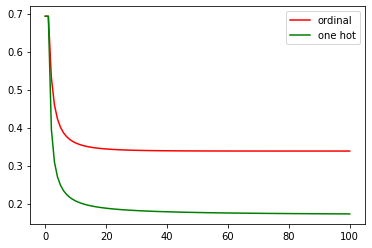

In [ ]:
reg_corona_ordinal = RegLogistique()
reg_corona_onehot = RegLogistique()

# Train the 2 models
reg_corona_ordinal.entrainer(X_corona_ordinal_train, Y_corona_train)
reg_corona_onehot.entrainer(X_corona_onehot_train, Y_corona_train)


# Display of the evolution of the costs
plt.plot(reg_corona_ordinal.couts, color="red", label="ordinal")
plt.plot(reg_corona_onehot.couts, color="green", label="one hot")
plt.legend()
plt.show()

**Note**: The onehot encoding is better than the ordinal


**Analysis**: The ordinal is based on the fact to orodinate the data, which will make the data depend on each other, and this is not good especially when the order has no meaning like the example of the countries. Whereas the Onehot method will remove this dependency between the data which will give good results, because it is based on the creation of a vector of indicator variables.


In [ ]:
reg_corona_ordinal.Theta, reg_corona_onehot.Theta

(array([ 0.70786296,  0.90649818, -2.02077096]),
 array([ 1.36571231, -1.57911326,  1.68650474, -0.21323331, -1.49315532]))

### 3.5- Test 

The quality of a classification system is measured using the confusion matrix: 

| - | Estimated (1) | Estimated (0) |
| --- | ---| ---|
| Actual (1) | TP (true positives) | FN (false negatives)
| Actual (0) | TP (false positives) | TN (true negatives) |

There are two metrics: 
- precision (or positive predictive value) is the proportion of relevant items among all proposed items; 
- Recall (or sensitivity) is the proportion of relevant items proposed among all relevant items. 


In [ ]:
# Here, we want the prediction as 1 and 0 and not probabilities
# The threshold is 0.5 (default)
H_corona_ordinal_test = reg_corona_ordinal.predire(X_corona_ordinal_test,prob=False,seuil=0.5)
H_corona_onehot_test = reg_corona_onehot.predire(X_corona_onehot_test,prob=False,seuil=0.5)

# Display the sum of 1's for each 
H_corona_ordinal_test.sum(), H_corona_onehot_test.sum()

(17, 18)

In [ ]:
# Functions that calculate the confusion matrix
def calculerTP(Y_reel, Y_predit):
    return (Y_reel*Y_predit).sum()

def calculerFN(Y_reel, Y_predit): 
    return np.count_nonzero((Y_reel - Y_predit)==1)

def calculerFP(Y_reel, Y_predit): 
    return np.count_nonzero((Y_reel - Y_predit)==-1)

def calculerTN(Y_reel, Y_predit): 
    return len(Y_reel) - (calculerTP(Y_reel, Y_predit) + calculerFP(Y_reel, Y_predit) + calculerFN(Y_reel, Y_predit))

TP_corona_ordinal = calculerTP(Y_corona_test, H_corona_ordinal_test)
FN_corona_ordinal = calculerFN(Y_corona_test, H_corona_ordinal_test)
FP_corona_ordinal = calculerFP(Y_corona_test, H_corona_ordinal_test)
TN_corona_ordinal = calculerTN(Y_corona_test, H_corona_ordinal_test)

TN_corona_ordinal, FP_corona_ordinal, FN_corona_ordinal, TP_corona_ordinal

(7.0, 1, 3, 16.0)

In [ ]:
# To confirm the solution 
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_corona_test, H_corona_ordinal_test).ravel()
tn, fp, fn, tp

(7, 1, 3, 16)

In [ ]:
TP_corona_onehot = calculerTP(Y_corona_test, H_corona_onehot_test)
FN_corona_onehot = calculerFN(Y_corona_test, H_corona_onehot_test)
FP_corona_onehot = calculerFP(Y_corona_test, H_corona_onehot_test)
TN_corona_onehot = calculerTN(Y_corona_test, H_corona_onehot_test)

TN_corona_onehot, FP_corona_onehot, FN_corona_onehot, TP_corona_onehot

(8.0, 0, 1, 18.0)

In [ ]:
# The recall and precision functions
def rappel(TN, FP, FN, TP): 
    return TP/(TP+FN)

def precision(TN, FP, FN, TP): 
    return TP/(TP+FP)

In [ ]:
# Overlay comparison 
R_corona_ordianl = rappel(TN_corona_ordinal, FP_corona_ordinal, FN_corona_ordinal, TP_corona_ordinal)
R_corona_onehot = rappel(TN_corona_onehot, FP_corona_onehot, FN_corona_onehot, TP_corona_onehot)

R_corona_ordianl, R_corona_onehot

(0.8421052631578947, 0.9473684210526315)

In [ ]:
# Precision comparaison
P_corona_ordianl = precision(TN_corona_ordinal, FP_corona_ordinal, FN_corona_ordinal, TP_corona_ordinal)
P_corona_onehot = precision(TN_corona_onehot, FP_corona_onehot, FN_corona_onehot, TP_corona_onehot)

P_corona_ordianl, P_corona_onehot

(0.9411764705882353, 1.0)